In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns='Id', axis = 1, inplace = True)

In [5]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

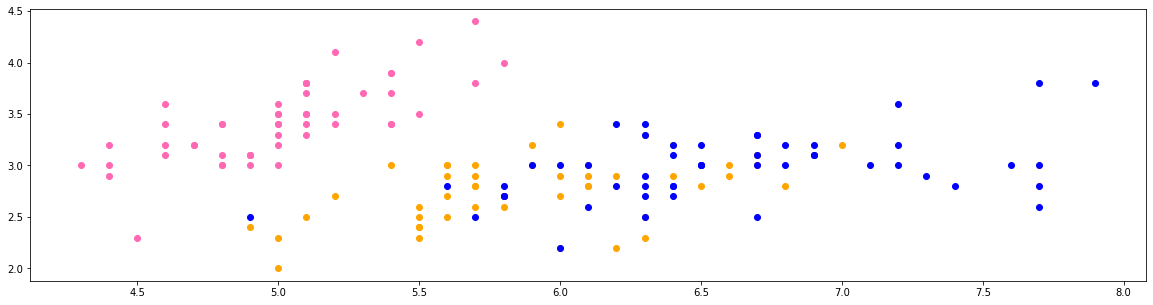

In [7]:
iris_setosa = data[data[list(data.columns)[-1]] == 'Iris-setosa']
iris_versicolor = data[data[list(data.columns)[-1]] == 'Iris-versicolor']
iris_virginica = data[data[list(data.columns)[-1]] == 'Iris-virginica']
fig, axes = plt.subplots(1,1, figsize= (20,5))
plt.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c = 'hotpink', label = 'iris_setosa')
plt.scatter(iris_versicolor['SepalLengthCm'],iris_versicolor['SepalWidthCm'], c = 'orange', label = 'iris_versicolor')
plt.scatter(iris_virginica['SepalLengthCm'],iris_virginica['SepalWidthCm'], c = 'blue', label = 'iris_virginica')
plt.legend
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(scaledX,encodedY, test_size=0.35, random_state= 2)

from sklearn import ensemble
rfcls = ensemble.RandomForestClassifier()
rfcls.fit(xtrain,ytrain)
ypred = rfcls.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True])

In [10]:
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix:', confusion_matrix(ypred, ytest))
print('f1_Score:', f1_score(ypred,ytest, average = None))

Confusion Matrix: [[21  0  0]
 [ 0 15  2]
 [ 0  1 14]]
f1_Score: [1.         0.90909091 0.90322581]


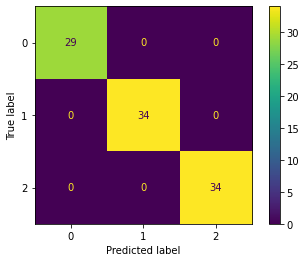

In [11]:
from sklearn import metrics
metrics.plot_confusion_matrix(rfcls, xtrain,ytrain)

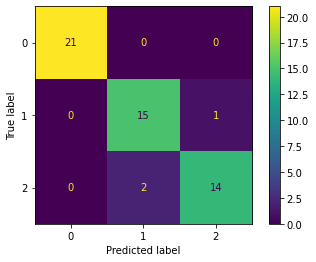

In [12]:
metrics.plot_confusion_matrix(rfcls,xtest,ytest)

In [13]:
from sklearn.model_selection import cross_val_score
#rfmodel = ensemble.RandomForestClassifier(random_state=3)
cv = cross_val_score(
    rfcls,scaledX, encodedY, cv = 3, scoring= 'accuracy'
)
cv.mean()

0.96

In [14]:
ensemble.RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [20]:
from sklearn.model_selection import RandomizedSearchCV
rfmodel = ensemble.RandomForestClassifier(random_state= 4)
model = RandomizedSearchCV(
    rfmodel,
    param_distributions={
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2', None], 
        'min_samples_split': list(range(3,80,10)), 
        'max_depth': list(range(5,450,10)), 
        'n_estimators': list(range(10,1000,80)),
        'bootstrap': [True, False],
        'warm_start': [False, True]
    },
    cv = 4, scoring='accuracy', n_jobs = -1, verbose= 4
)
model.fit(xtrain,ytrain)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, 45, 55, 65,
                                                      75, 85, 95, 105, 115, 125,
                                                      135, 145, 155, 165, 175,
                                                      185, 195, 205, 215, 225,
                                                      235, 245, 255, 265, 275,
                                                      285, 295, ...],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [3, 13, 23, 33, 43,
                                                          

In [21]:
model.best_params_

{'warm_start': False,
 'n_estimators': 730,
 'min_samples_split': 3,
 'max_features': None,
 'max_depth': 275,
 'criterion': 'gini',
 'bootstrap': True}

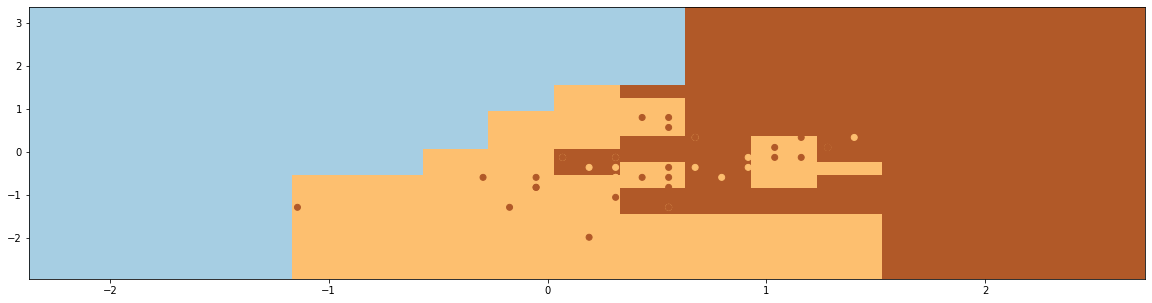

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

final_model = ensemble.RandomForestClassifier(
    warm_start= False,
    n_estimators = 730,
    min_samples_split=  3,
    max_features = None,
    max_depth= 275,
    criterion = 'gini',
    bootstrap = True
)
final_model.fit(scaledX[:,:2], encodedY)
xmin, xmax = scaledX[:,0].min() - 0.5, scaledX[:,0].max() + 0.5
ymin, ymax = scaledX[:,1].min() - 0.5, scaledX[:,1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.3), np.arange(ymin, ymax, 0.3)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

plt.scatter(scaledX[:,0], scaledX[:,1], c = encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [30]:
# pipeline
from sklearn import pipeline

classifier = ensemble.RandomForestClassifier(
    warm_start= False,
    n_estimators = 730,
    min_samples_split=  3,
    max_features = None,
    max_depth= 275,
    criterion = 'gini',
    bootstrap = True
)
pipe = pipeline.Pipeline(
    [
        ('scaler', StandardScaler()),
        ('forest', classifier)
    ]
)
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(max_depth=275, max_features=None,
                                        min_samples_split=3,
                                        n_estimators=730))])

In [31]:
np.random.randint(0,50,3)

array([47,  7, 23])

In [34]:
classifier = ensemble.RandomForestClassifier(
    warm_start= False,
    n_estimators = 730,
    min_samples_split=  3,
    max_features = None,
    max_depth= 275,
    criterion = 'gini',
    bootstrap = True
)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)
ypred == ytest
yhat = np.argmax(classifier.predict_proba(xtest))
encoder.inverse_transform(ypred)

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
    

In [35]:
indices = np.random.randint(0,120,4)
features = data.iloc[indices, 0:-1].values
features

array([[5.8, 2.7, 3.9, 1.2],
       [5.8, 2.7, 4.1, 1. ],
       [4.3, 3. , 1.1, 0.1],
       [5.2, 3.4, 1.4, 0.2]])

In [37]:
ypred = pipe.predict(features)
ypred

array([2, 2, 2, 2])

In [38]:
encoder.inverse_transform(ypred)

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [39]:
data.iloc[indices].values

array([[5.8, 2.7, 3.9, 1.2, 'Iris-versicolor'],
       [5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.2, 3.4, 1.4, 0.2, 'Iris-setosa']], dtype=object)